In [1]:
from sklearn import datasets

housing = datasets.fetch_california_housing()
housing.feature_names, housing.target_names

(['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 ['MedHouseVal'])

In [2]:
from sklearn import datasets
import pandas as pd

housing = datasets.fetch_california_housing()
housingDF = pd.DataFrame(housing.data, columns=housing.feature_names)
housingDF.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [3]:
from sklearn import datasets
import pandas as pd

housing = datasets.fetch_california_housing()
housingDF = pd.DataFrame(housing.data, columns=housing.feature_names)
housingDF.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [4]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

housing = datasets.fetch_california_housing()
X = housing.data
y = housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512,), (4128,))

In [7]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

housing = datasets.fetch_california_housing()
X = housing.data
y = housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsRegressor(n_neighbors=5, p=2, metric='minkowski', algorithm='auto')
knn.fit(X_train, y_train)

pred = knn.predict(X_test)
print('Train accuracy: %.2f' % knn.score(X_train, y_train))
print('Test accuracy: %.2f' % knn.score(X_test, y_test))

Train accuracy: 0.45
Test accuracy: 0.15


In [8]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

housing = datasets.fetch_california_housing()
X = housing.data
y = housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

knn = KNeighborsRegressor(n_neighbors=5, p=1, metric='minkowski', algorithm='auto')
knn.fit(X_train_std, y_train)

pred = knn.predict(X_test_std)
print('Train accuracy: %.2f' % knn.score(X_train_std, y_train))
print('Test accuracy: %.2f' % knn.score(X_test_std, y_test))

Train accuracy: 0.82
Test accuracy: 0.70


In [9]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

housing = datasets.fetch_california_housing()
X = housing.data
y = housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

knn = KNeighborsRegressor(n_neighbors=5, p=1, metric='minkowski', algorithm='auto')
knn.fit(X_train_std, y_train)

pred = knn.predict(X_test_std)
print('Train accuracy: %.2f' % knn.score(X_train_std, y_train))
print('Test accuracy: %.2f' % knn.score(X_test_std, y_test))
print('MSE: %.2f' % mean_squared_error(y_test, pred))
print('R2: %.2f' % r2_score(y_test, pred))
print('MAE: %.2f' % mean_absolute_error(y_test, pred))

Train accuracy: 0.82
Test accuracy: 0.70
MSE: 0.39
R2: 0.70
MAE: 0.42


In [10]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

housing = datasets.fetch_california_housing()
X = housing.data
y = housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor())
])

param_grid = {
    'knn__n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'knn__p': [1, 2, 3],
    'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'knn__metric': ['minkowski']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
print('Train accuracy: %.2f' % best_model.score(X_train, y_train))
print('Test accuracy: %.2f' % best_model.score(X_test, y_test))
print('MSE: %.2f' % mean_squared_error(y_test, y_pred))
print('R2: %.2f' % r2_score(y_test, y_pred))
print('MAE: %.2f' % mean_absolute_error(y_test, y_pred))

for item in best_model.get_params():
    print(item, ":", best_model.get_params()[item])

Train accuracy: 0.79
Test accuracy: 0.72
MSE: 0.37
R2: 0.72
MAE: 0.41
memory : None
steps : [('scaler', StandardScaler()), ('knn', KNeighborsRegressor(n_neighbors=8, p=1))]
verbose : False
scaler : StandardScaler()
knn : KNeighborsRegressor(n_neighbors=8, p=1)
scaler__copy : True
scaler__with_mean : True
scaler__with_std : True
knn__algorithm : auto
knn__leaf_size : 30
knn__metric : minkowski
knn__metric_params : None
knn__n_jobs : None
knn__n_neighbors : 8
knn__p : 1
knn__weights : uniform


c:\Users\jk121\.conda\envs\MachineLearn\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jk121\.conda\envs\MachineLearn\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jk121\.conda\envs\MachineLearn\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jk121\.conda\envs\MachineLearn\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: 

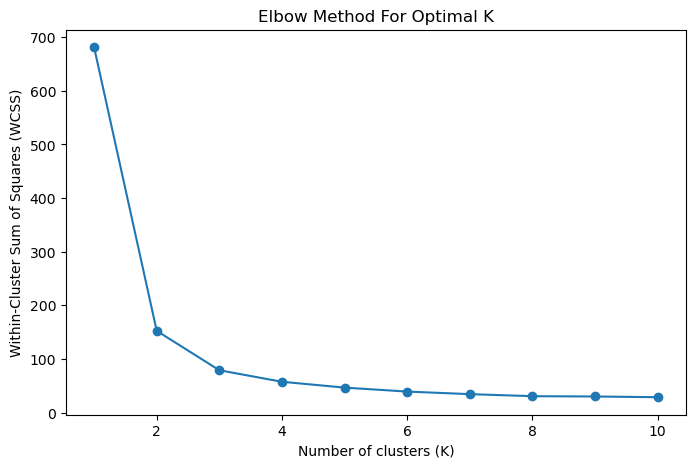

In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

X = load_iris().data

# Calculate WCSS for a range of K values
wcss = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X)
    # inertia_ is the WCSS for the fitted model
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method For Optimal K')
plt.show()


c:\Users\jk121\.conda\envs\MachineLearn\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jk121\.conda\envs\MachineLearn\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jk121\.conda\envs\MachineLearn\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jk121\.conda\envs\MachineLearn\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: 

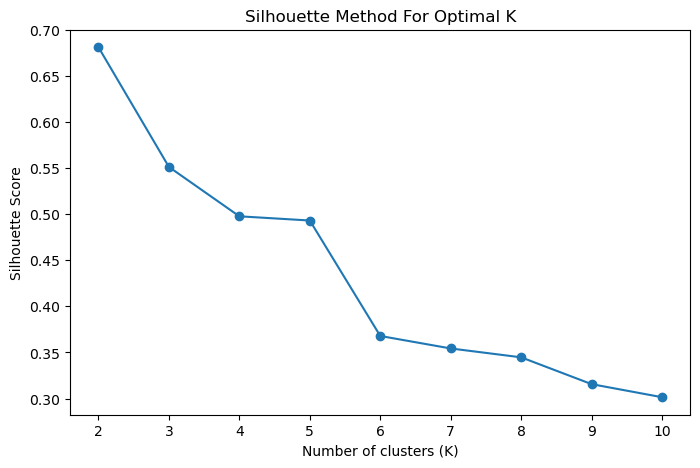

In [2]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris

X = load_iris().data

silhouette_scores = []
K_range = range(2, 11)  # Silhouette score is not defined for K=1
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Plot the Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method For Optimal K')
plt.show()

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from gap_statistic import OptimalK
from sklearn.datasets import load_iris

X = load_iris().data

optimalK = OptimalK(parallel_backend='joblib')
n_clusters = optimalK(X, cluster_array=np.arange(1, 11))
print('Optimal number of clusters:', n_clusters)

gap_df = optimalK.gap_df
plt.plot(gap_df['n_clusters'], gap_df['gap_value'], marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistic Method For Optimal K')
plt.show()

ModuleNotFoundError: No module named 'gap_statistic'

: 